## Iris Flower Machine Learning

In [85]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [95]:
from ipywidgets import interact, interactive
from IPython.display import display

In [2]:
# Load dataset
irisData = pd.read_csv("../data/irisData.csv")

### Data Preview

In [3]:
# Take a peek at the data
print(irisData.head(10))

   sepalLength  sepalWidth  petalLength  petalWidth        class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
5          5.4         3.9          1.7         0.4  Iris-setosa
6          4.6         3.4          1.4         0.3  Iris-setosa
7          5.0         3.4          1.5         0.2  Iris-setosa
8          4.4         2.9          1.4         0.2  Iris-setosa
9          4.9         3.1          1.5         0.1  Iris-setosa


In [4]:
# Summary statistics
print(irisData.describe())

       sepalLength  sepalWidth  petalLength  petalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


### Exploratory Data Analysis & Visualisation

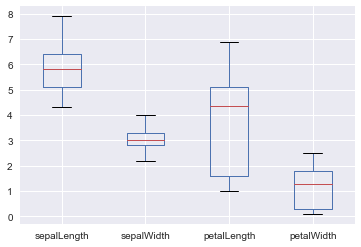

In [5]:
# Box-and-whisker plots
irisData.boxplot(figsize=(10, 5))
plt.show()

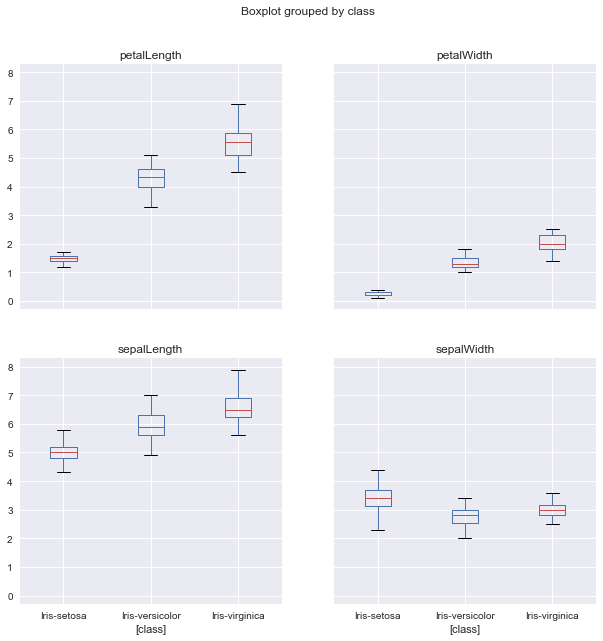

In [6]:
# Box plots grouped by species (class)
irisData.boxplot(by="class", figsize=(10, 10))
plt.show()

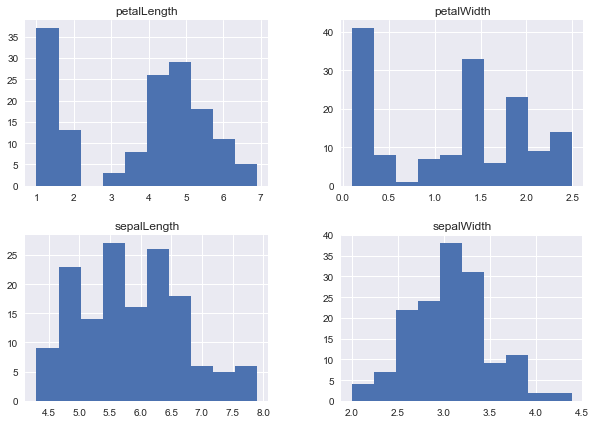

In [7]:
# Histograms
irisData.hist(figsize=(10, 7))
plt.show()

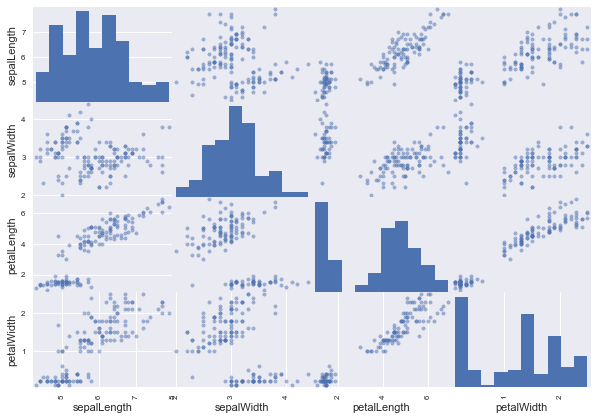

In [8]:
# Scatter matrix plot
pd.scatter_matrix(irisData, figsize=(10, 7))
plt.show()

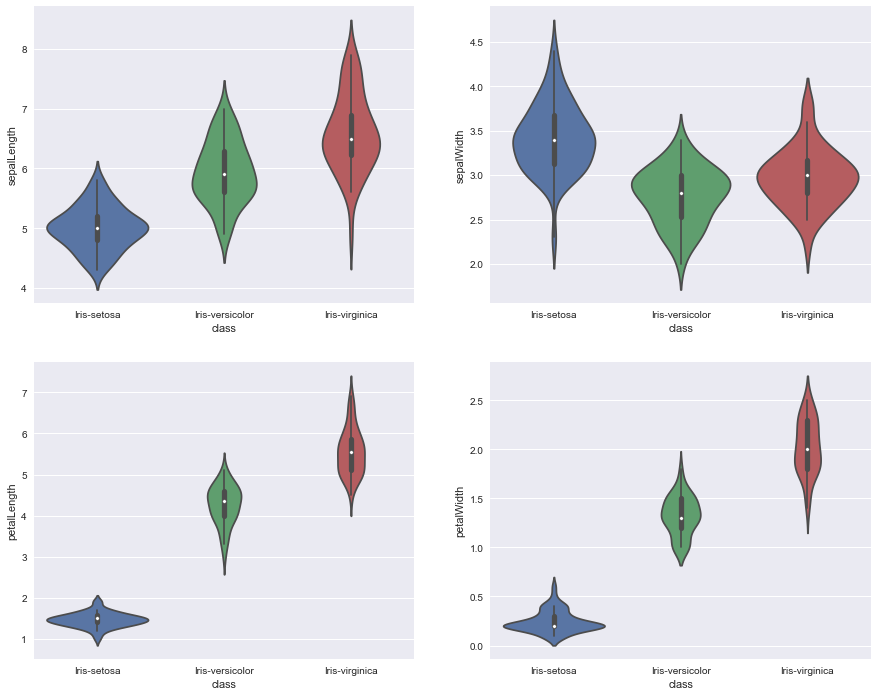

In [9]:
# Violin plots for each feature
plt.subplots(2, 2, figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.violinplot(data=irisData, x="class", y="sepalLength")

plt.subplot(2, 2, 2)
sns.violinplot(data=irisData, x="class", y="sepalWidth")

plt.subplot(2, 2, 3)
sns.violinplot(data=irisData, x="class", y="petalLength")

plt.subplot(2, 2, 4)
sns.violinplot(data=irisData, x="class", y="petalWidth")

plt.show()

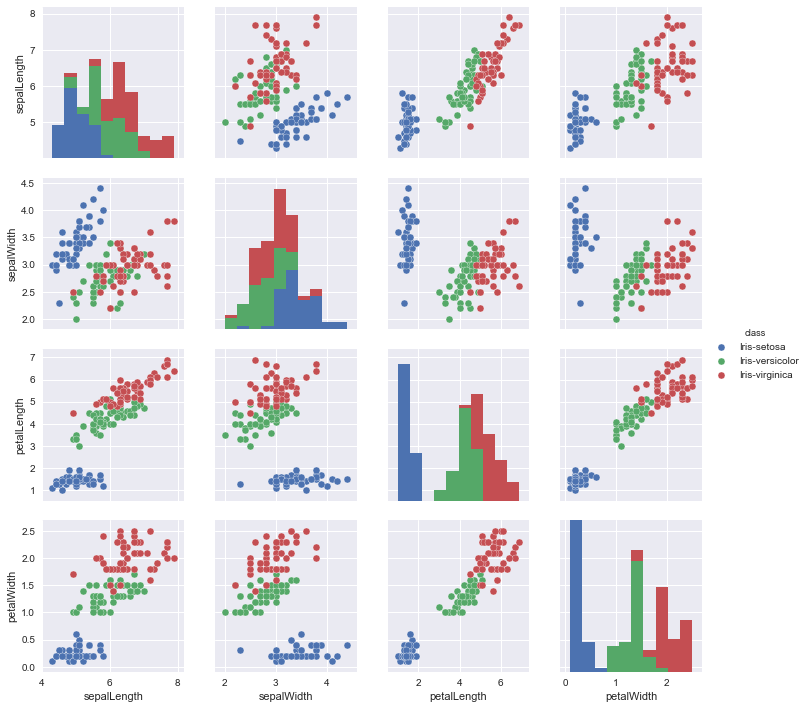

In [10]:
sns.pairplot(irisData, hue="class")
plt.show()

### Machine Learning - Selecting a Model

In [16]:
# Split data into training and test set
# Training set will be used for cross-validation, while test set is held out until the very end
X = irisData.values[:, 0:4] # features
Y = irisData.values[:, 4] # target

validation_size = 0.2
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [66]:
# List of algorithms (models) to evaluate
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Evaluation each model using cross-validation
cv_results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_result = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
    cv_results.append(cv_result)
    names.append(name)
    msg = "%s accuracy: %0.3f (+/- %0.2f)" % (name, cv_result.mean(), cv_result.std()*2)
    print(msg)

LR accuracy: 0.967 (+/- 0.08)
LDA accuracy: 0.975 (+/- 0.08)
KNN accuracy: 0.983 (+/- 0.07)
CART accuracy: 0.975 (+/- 0.08)
NB accuracy: 0.975 (+/- 0.11)
SVM accuracy: 0.992 (+/- 0.05)


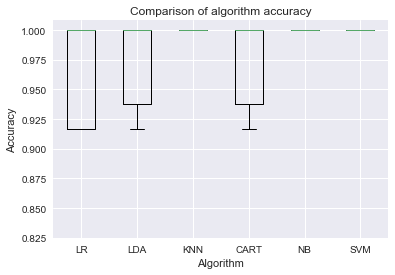

In [70]:
# Compare algorithms
plt.boxplot(cv_results)
plt.title("Comparison of algorithm accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.xticks(range(1, 7), names)
plt.show()

In [81]:
# Fit model and make predictions using test set
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
print("Accuracy score: %0.2f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score: 0.90
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



### Making Predictions

In [114]:
# Function to predict iris species based on sepal and petal measurements
def makePrediction(sepalLength, sepalWidth, petalLength, petalWidth):
    print("The flower is predicted to be %s" % clf.predict([[sepalLength, sepalWidth, petalLength, petalWidth]])[0])
    return clf.predict([[sepalLength, sepalWidth, petalLength, petalWidth]])

In [115]:
# Create interactive slider widget
w = interactive(makePrediction, sepalLength=(4, 8, 0.1), sepalWidth=(2, 5, 0.1), petalLength=(1, 7, 0.1), petalWidth=(0.1, 3, 0.1))

In [116]:
# Display interactive slider widget
display(w)

interactive(children=(FloatSlider(value=6.0, description='sepalLength', max=8.0, min=4.0), FloatSlider(value=3…